/var/folders/l3/kynmmffn6mb9tjg_c1n4qtd80000gn/T/ipykernel_95477/1404711466.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  x_dat = pd.read_csv('/Users/nathaliehaurberg/Data/MagneticCVs/VVPup_Xband_Feb22.dat', delim_whitespace=True, header=None)


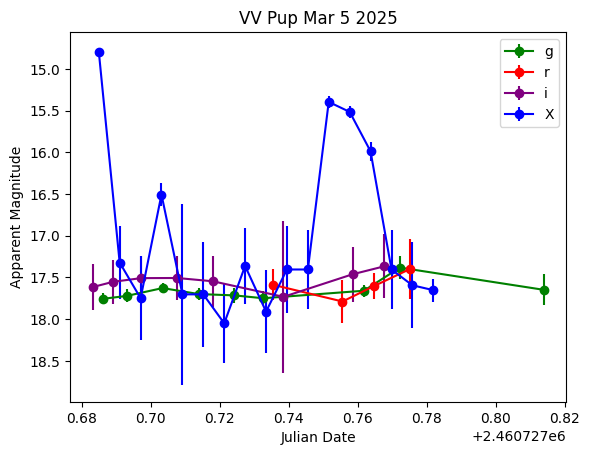

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time
import astropy

#read in the X-band data'
x_dat = pd.read_csv('/Users/nathaliehaurberg/Data/MagneticCVs/VVPup_Xband_Feb22.dat', delim_whitespace=True, header=None)  
time = x_dat.iloc[:,0].astype(str)
flux = x_dat.iloc[:,1]
flux_err = x_dat.iloc[:,2]

# Convert time to ISO format and then to Julian Date
time_iso = '2025-02-21T' + time  # Vectorized string concatenation
time_iso_list = time_iso.tolist() 
t = Time(time_iso_list, format='isot', scale='utc') # Convert all at once
jd = t.jd
xmag = -2.5*np.log10(flux*10**(-6)/3631)-3
xmag_err = 1.0857 * flux_err / flux

# Create a DataFrame from the original dictionary

x_results = pd.DataFrame({
    'Julian_Date': jd,
    'x_flux': flux,
    'x_flux_err': flux_err,
    'x_mag': xmag,
    'x_mag_err': xmag_err,
})

# Read in csv file using pandas
results_g = pd.read_csv('/Users/nathaliehaurberg/Data/MagneticCVs/VV_Pup_RLMT_Feb_2025/FullPhot/Results_g.csv')
results_r = pd.read_csv('/Users/nathaliehaurberg/Data/MagneticCVs/VV_Pup_RLMT_Feb_2025/FullPhot/Results_r.csv')
results_i = pd.read_csv('/Users/nathaliehaurberg/Data/MagneticCVs/VV_Pup_RLMT_Feb_2025/FullPhot/Results_i.csv')

#results_z = pd.read_csv('/Users/nathaliehaurberg/Data/SumerMACRO/python_results_z.csv')

# Create DataFrames from the original dictionaries
new_results_g_df = pd.DataFrame({
    'file': results_g['file'],
    'Julian_Date': results_g['Julian_Date'],
    'stlmi_mag_g': results_g['star_5_mag'],
    'stlmi_mag_err_g': results_g['star_5_mag_error'],
})

new_results_r_df = pd.DataFrame({
    'file': results_r['file'],
    'Julian_Date': results_r['Julian_Date'],
    'stlmi_mag_r': results_r['star_5_mag'],
    'stlmi_mag_err_r': results_r['star_5_mag_error'],
})

new_results_i_df = pd.DataFrame({
    'file': results_i['file'],
    'Julian_Date': results_i['Julian_Date'],
    'stlmi_mag_i': results_i['star_5_mag'],
    'stlmi_mag_err_i': results_i['star_5_mag_error'],
})

'''new_results_z_df = pd.DataFrame({
    'file': results_z['file'],
    'Julian_Date': results_z['Julian_Date'],
    'stlmi_mag_z': results_z['star_5_mag'],
    'stlmi_mag_err_z': results_z['star_5_mag_error'],
})'''


#Sort results by Julian Date
results_g = new_results_g_df.sort_values('Julian_Date')
results_r = new_results_r_df.sort_values('Julian_Date')
results_i = new_results_i_df.sort_values('Julian_Date')


# Plot the relative flux for each filter
plt.errorbar(results_g['Julian_Date'], results_g['stlmi_mag_g'], yerr=results_g['stlmi_mag_err_g'], fmt='o-', label='g', color="green", markersize=6)
plt.errorbar(results_r['Julian_Date'], results_r['stlmi_mag_r'], yerr=results_r['stlmi_mag_err_r'], fmt='o-', label='r', color="red", markersize=6)
plt.errorbar(results_i['Julian_Date'], results_i['stlmi_mag_i'], yerr=results_i['stlmi_mag_err_i'], fmt='o-', label='i', color="purple", markersize=6)
#plt.errorbar(results_y['Julian_Date'], results_y['rel_flux'], yerr=results_y['star_5_relerror'], fmt='o-', label='y', color='red')
#plt.errorbar(results_z['Julian_Date'], results_z['stlmi_mag_z'], yerr=results_z['stlmi_mag_err_z'], fmt='o-', label='z', color='purple', markersize=6)
#plt.scatter(append_results_z_df['Julian_Date'], append_results_z_df['stlmi_mag_z'], marker='s', color='purple', s=50)
plt.errorbar(x_results['Julian_Date'], x_results['x_mag'], yerr=x_results['x_mag_err'], fmt='o-', label='X', color='blue', markersize=6)
plt.xlabel('Julian Date')
plt.ylabel('Apparent Magnitude')
plt.gca().invert_yaxis()
plt.title('VV Pup Mar 5 2025')
plt.legend()
plt.show()
